In [1]:
# univariate cnn lstm example
import numpy as np
import pandas as pd
from numpy import array
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import TimeDistributed
from tensorflow.layers import Conv1D
from tensorflow.layers import MaxPooling1D
import matplotlib
import matplotlib.pyplot as plt

In [2]:
# split a univariate sequence into samples
def split_sequence(sequence, n_steps_in, n_steps_out):
	X, y = list(), list()
	for i in range(len(sequence)):
		# find the end of this pattern
		end_ix = i + n_steps_in
		out_end_ix = end_ix + n_steps_out
		# check if we are beyond the sequence
		if out_end_ix > len(sequence):
			break
		# gather input and output parts of the pattern
		seq_x, seq_y = sequence[i:end_ix], sequence[end_ix:out_end_ix]
		X.append(seq_x)
		y.append(seq_y)
	return array(X), array(y)

In [3]:
# Dada una secuencia de Entrada
data= pd.read_csv('EURUSD1.csv', 
                  sep=',', 
                  names=["time", "Open", "Max", "Min", "Close", "Volumen"])

In [4]:
raw_seq= pd.Series((data['Max'] - data['Max'].mean())/ (data['Max'].max() - data['Max'].min())).values

In [5]:
# choose a number of time steps
n_steps_in, n_steps_out = 3, 2
n_features = 1

In [6]:
# split into samples
X, y = split_sequence(raw_seq, n_steps_in, n_steps_out)
X_train=X[0:-50]
y_train=y[0:-50]
X_test=X[-50:]
y_test=y[-50:]

In [7]:
X_train = X_train.reshape((X_train.shape[0], X_train.shape[1], n_features))
X_test = X_test.reshape((X_test.shape[0], X_test.shape[1], n_features))

In [8]:
# define model
model = Sequential()
model.add(LSTM(100, activation='relu', return_sequences=True, input_shape=(n_steps_in, n_features)))
model.add(LSTM(100, activation='relu'))
model.add(Dense(n_steps_out))
model.compile(optimizer='adam', loss='mse')

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Use tf.cast instead.


In [9]:
# fit model
model.fit(X_train, y_train, epochs=2000, verbose=0)

Instructions for updating:
Use tf.cast instead.


In [10]:
# demonstrate prediction
y_tout = model.predict(X_test, verbose=0)

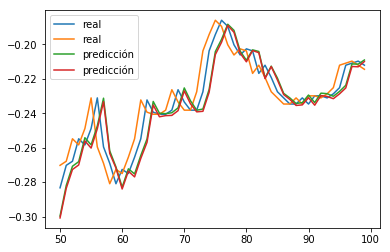

In [36]:
fig, ax = plt.subplots()
ax.plot(np.arange(50)+50,y_test[-50:], label='real')
ax.plot(np.arange(50)+50,y_tout,label='predicción')
ax.legend()
plt.show()

In [2]:
fig, ax = plt.subplots()
ax = ax.twinx()
ax.plot(np.arange(50)+50,y_test, label='real')
#ax.plot(np.arange(50)+50,y_test, label='real')
ax.plot(np.arange(50)+50,y_tout[0],label='predicción')
ax.legend()
plt.show()

NameError: name 'plt' is not defined

In [40]:
N=[]
vp2=[]
for t in range (0,np.shape(y_tout)[0]-2):
    if (np.sign([y_test[t+1][1]-y_test[t][1]])*np.sign([y_tout[t+1][0]-y_test[t][1]]))>0:
        vp2.append(1)
        N.append(1)
    else:
        N.append(1)
MDA=1/sum(N)*sum(vp2)

In [41]:
MDA

0.3958333333333333

In [1]:
# demonstrate prediction
x_input = array([70, 80, 90])
x_input = x_input.reshape((1, n_steps_in, n_features))
yhat = model.predict(x_input, verbose=0)
print(yhat)

NameError: name 'array' is not defined